# Text Analyst and Text Classification

In [45]:
import pandas as pd
import tweepy
from tweepy import *
import xlsxwriter
from twython import Twython
import re
import glob

import pandas as pd
import re
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

import nltk
#nltk.download()
from nltk.corpus import stopwords
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from datetime import datetime

scraping twitter

untuk mendapatkan kode consumer_key, consumer_secret, access_token, acces_token_secret bisa bikin aku di link : https://developer.twitter.com/en/apps

In [2]:
consumer_key = 'xxxxxxxxxxxxxxx'
consumer_secret = 'xxxxxxxxxxxxxxxxxxx'
access_token = 'xxxxxxxxxxxxxx'
access_token_secret = 'xxxxxxxxxxx'

In [3]:
# Authorization to consumer key and consumer secret 
auth = OAuthHandler(consumer_key, consumer_secret) 

# Access to user's access key and access secret 
auth.set_access_token(access_token, access_token_secret) 

# Calling api 
api = tweepy.API(auth, wait_on_rate_limit=True)

# Twitter
twitter = Twython(consumer_key, consumer_secret, access_token, access_token_secret)

In [4]:
def get_tweets_by_keyword(listOfTweets, keyword, numOfTweets):
    # Iterate through all tweets containing the given word, api search mode
    for tweet in tweepy.Cursor(api.search, lang = "id", q=keyword+" -filter:retweets", tweet_mode="extended").items(numOfTweets):
        t = tweet.full_text
        listOfTweets.append(t)   
    return listOfTweets

def get_tweets_by_account(listOfTweets, keyword, numOfTweets):
    user_timeline = twitter.get_user_timeline(screen_name=keyword, count = numOfTweets, tweet_mode = "extended")   
    for tweet in user_timeline:
        t = tweet['full_text']
        listOfTweets.append(t)       
    return listOfTweets

In [5]:
kata_kunci = []
keyword = ['covid']

for kd in keyword:
    konten = get_tweets_by_keyword(kata_kunci, kd, 3500)
    
akun = []
dewasa = ['@jokowi', '@aniesbaswedan', '@NarasiNewsroom', '@kumparan',  '@detikcom' ]
for d in dewasa:
    acc_dewasa = get_tweets_by_account(akun, d, 3500)

In [6]:
kata_kunci [:20]

['Sempat Tertunda, Camat Parungpanjang Disuntik Vaksin Covid-19 - https://t.co/WepfVSPhbT',
 'Waspada Penipuan online. Yuk Kenali Kejahatan Cyber.\n\nAda ribuan penipu sudah bersiap memanfaatkan program vaksinasi Covid-19. Penipuan akan terlihat meyakinkan, seolah resmi dikeluarkan oleh pemerintah. Oleh karena itu masyarakat diminta waspada\n\n#CerdasBermediaDigital https://t.co/s1DL1KS3SI',
 'Perkantoran di Lebak Jadi Klaster Covid-19 Berisiko Tinggi: Penyebaran kasus COVID-19 di Kabupaten Lebak hampir setiap hari terjadi penambahan, bahkan sejak Februari 2021 lalu perkantoran menjadikan klaster penyebaran penyakit yang mematikan. https://t.co/fwRxbmOjbH',
 'Layanan Vaksinasi Corona Drive Thru Lansia, Kemenkes: Semoga Bisa Direplikasi di Kota yg lain https://t.co/IDxGzaAhok #Terbaru #berita #liputan6 #live',
 'FOTO: Giliran 1.000 Sopir Transportasi Umum Divaksin Corona di Poris Plawad Tangerang https://t.co/ADJwYIan4B #Terbaru #berita #liputan6 #live',
 '@eSnipped Madu......... \nStok

In [7]:
akun[:20]

['Dari helipad di Monumen Nasional, Jakarta siang ini, saya bertolak menuju Provinsi Banten dengan helikopter. \n\nDi Banten saya hendak ke Kab. Serang untuk meresmikan Bendungan Sindang Heula yang dibangun sejak 2015, lalu meresmikan kampus baru Universitas Sultan Ageng Tirtayasa. https://t.co/K8s9OHigxw',
 'Pertumbuhan ekonomi Indonesia 2020 jatuh di minus 2,19 persen. Namun, kinerja perdagangan luar negeri kita tahun 2020 cukup baik, yakni surplus US$21,7 miliar.\n\nDengan target pertumbuhan ekonomi 5 % dalam APBN tahun ini, kita tetap harus bekerja keras, bersemangat dan optimistis. https://t.co/gfmFMef4uB',
 'Saya mengajak Anda semua, para wajib pajak, jangan sampai terlambat. \n\nPajak yang kita bayarkan sangat dibutuhkan untuk mendukung program pemulihan ekonomi, meningkatkan daya beli masyarakat, dan pemulihan kesehatan seperti vaksinasi serta perlindungan sosial di masa pandemi ini.',
 'Sudah lima tahun ini saya lapor pajak tanpa perlu datang ke kantor pajak. Caranya? Online m

text analytics and text classification

In [8]:
data = pd.read_csv("data_shopee.csv", delimiter=",", encoding = 'iso-8859-1')
data.tail()

,text,label
3251,like you too,love
3252,buat jodohku shareloc dong pengen ketemu,love
3253,kalo pada dasarnya pengen pulang udah pasti la...,love
3254,yamauuuu kalo suka sama suka,love
3255,sayang yang sudah berjuang,love


clean multiple spaces with single space

In [9]:
data['text'] = data['text'].str.replace('\s+',' ')
data.tail()

E:\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


,text,label
3251,like you too,love
3252,buat jodohku shareloc dong pengen ketemu,love
3253,kalo pada dasarnya pengen pulang udah pasti la...,love
3254,yamauuuu kalo suka sama suka,love
3255,sayang yang sudah berjuang,love


Clean the punctuation

In [10]:
data['text'] = data['text'].str.replace('[^\w\s-]','')
data.tail()

E:\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


,text,label
3251,like you too,love
3252,buat jodohku shareloc dong pengen ketemu,love
3253,kalo pada dasarnya pengen pulang udah pasti la...,love
3254,yamauuuu kalo suka sama suka,love
3255,sayang yang sudah berjuang,love


Change data to be lowercase or uppercase

In [11]:
data['text'] = data['text'].apply(lambda x: x.lower())
data.tail()

,text,label
3251,like you too,love
3252,buat jodohku shareloc dong pengen ketemu,love
3253,kalo pada dasarnya pengen pulang udah pasti la...,love
3254,yamauuuu kalo suka sama suka,love
3255,sayang yang sudah berjuang,love


In [12]:
data['text'].value_counts()[:5]

bajingan                           14
alhamdulillah                      10
kasih sayang                        4
hahahaha                            4
pernah ngerasain jatuh cinta ga     3
Name: text, dtype: int64

In [13]:
word = pd.Series(' '.join(data['text']).split())
len (word)

22848

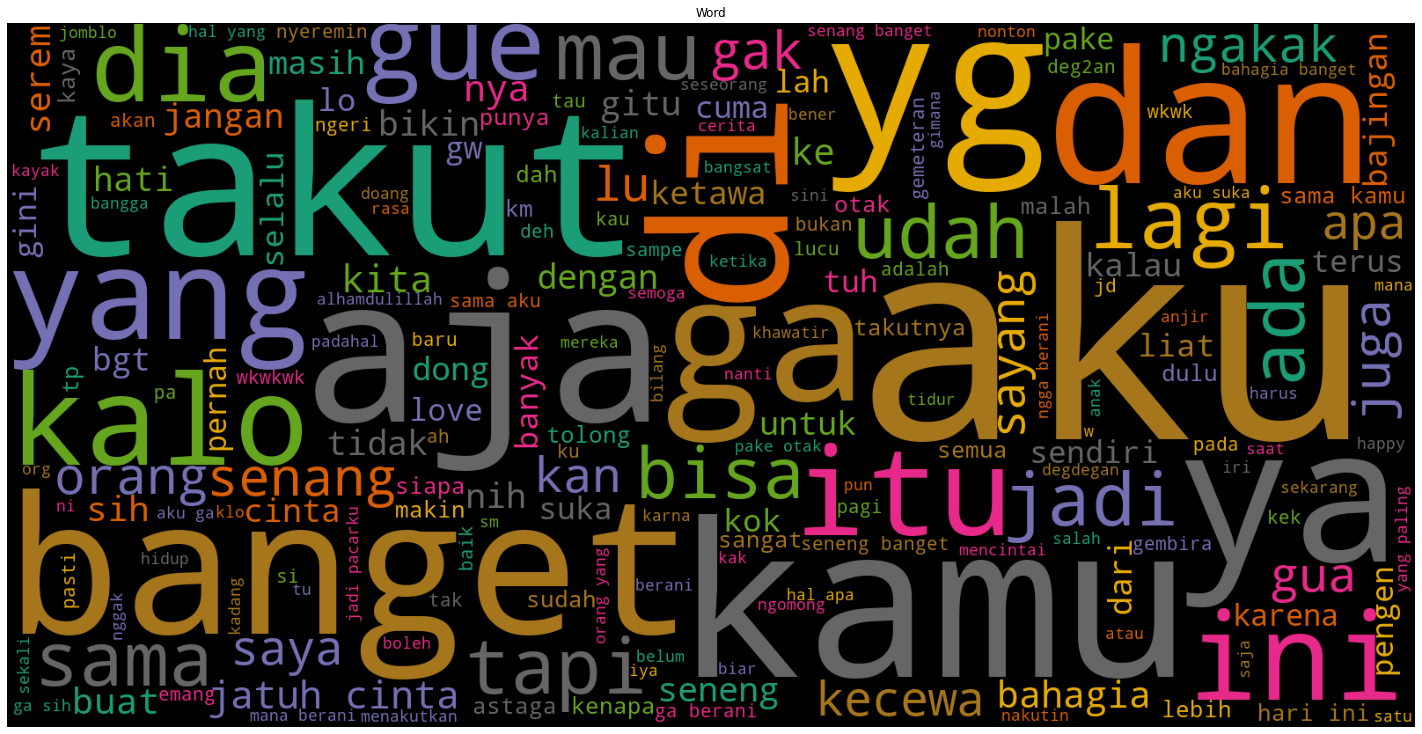

In [14]:
dat = ' '.join(word)
#data1 = dat.read()
%matplotlib inline
wordcloud = WordCloud(background_color='black', mode="RGB", width=1600, height=800, colormap="Dark2").generate(dat)
plt.figure(figsize=(20,10))
plt.title('Word')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [15]:
pd.Series(' '.join(data['text']).split()).value_counts()[:10]

aku       498
ga        266
banget    265
yang      259
kamu      252
sama      199
takut     188
ya        188
aja       185
di        184
dtype: int64

In [16]:
pd.Series(' '.join(data['text']).split()).value_counts()[:-10]

aku         498
ga          266
banget      265
yang        259
kamu        252
           ... 
yadah         1
tiktokan      1
wiranto       1
beresin       1
cuti          1
Length: 5294, dtype: int64

In [17]:
data['label'].value_counts()

happy     814
love      814
afraid    814
angry     814
Name: label, dtype: int64

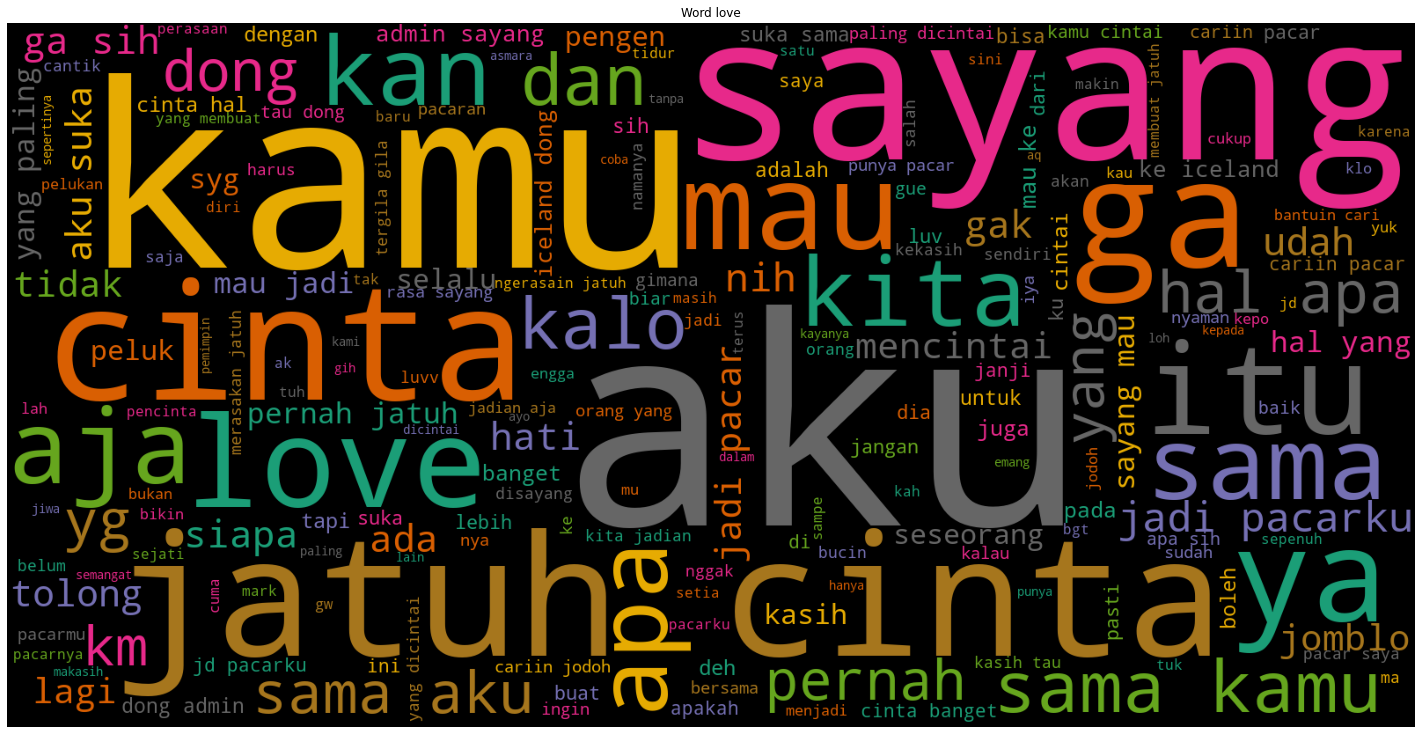

In [18]:
data_love = data.loc[(data['label'] == "love")]
word_love = pd.Series(' '.join(data_love['text']).split())
dat_love = ' '.join(word_love)
#data1 = dat.read()
%matplotlib inline
wordcloud = WordCloud(background_color='black', mode="RGB", width=1600, height=800, colormap="Dark2").generate(dat_love)
plt.figure(figsize=(20,10))
plt.title('Word love')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [19]:
pd.Series(' '.join(data_love['text']).split()).value_counts()[:-10]

aku         197
cinta       162
kamu        153
sayang      129
sama        101
           ... 
gatau         1
adakah        1
myself        1
akhlakmu      1
tp            1
Length: 1239, dtype: int64

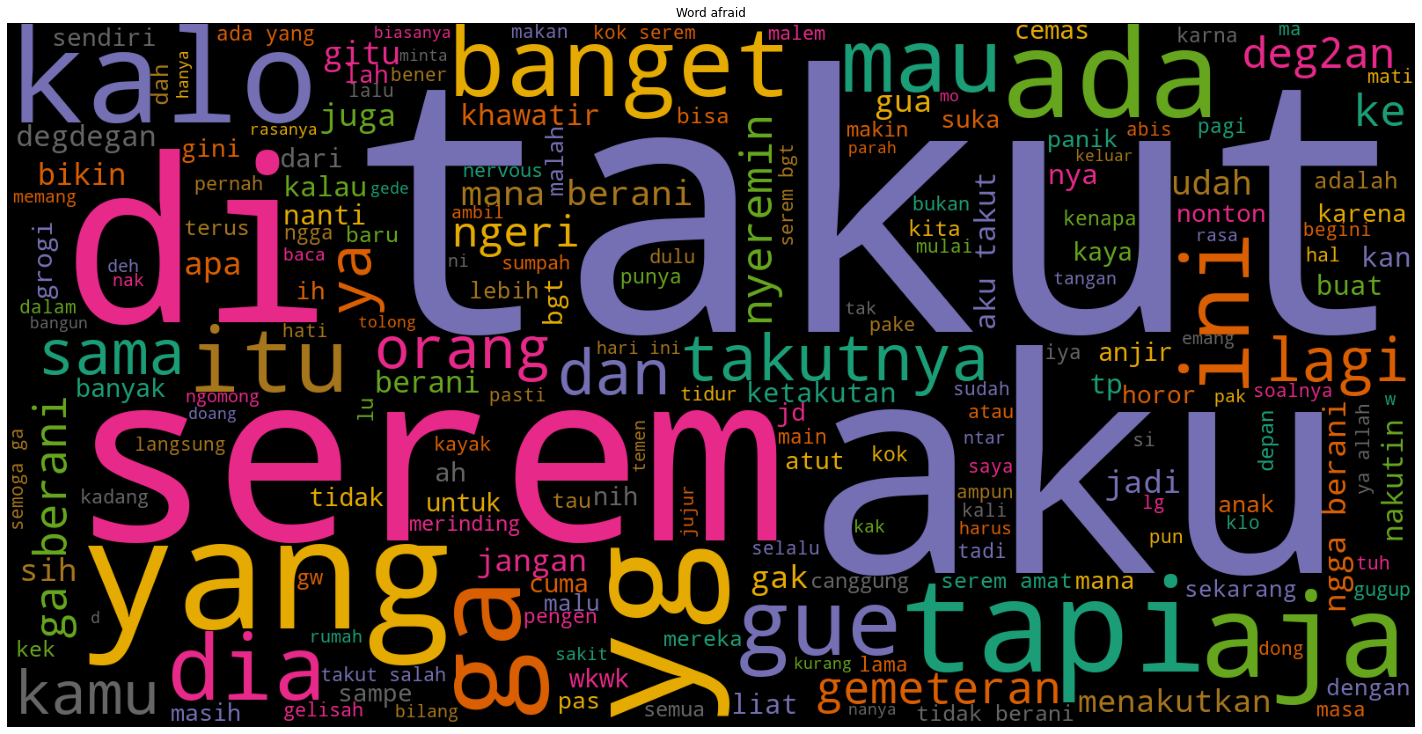

In [20]:
data_afraid = data.loc[(data['label'] == "afraid")]
word_afraid = pd.Series(' '.join(data_afraid['text']).split())
dat_afraid = ' '.join(word_afraid)

%matplotlib inline
wordcloud = WordCloud(background_color='black', mode="RGB", width=1600, height=800, colormap="Dark2").generate(dat_afraid)
plt.figure(figsize=(20,10))
plt.title('Word afraid')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [21]:
pd.Series(' '.join(data_afraid['text']).split()).value_counts()[:-10]

takut          184
aku            126
berani         108
serem           90
ga              85
              ... 
periksain        1
mengakuinya      1
bencana          1
balikan          1
membiru          1
Length: 2008, dtype: int64

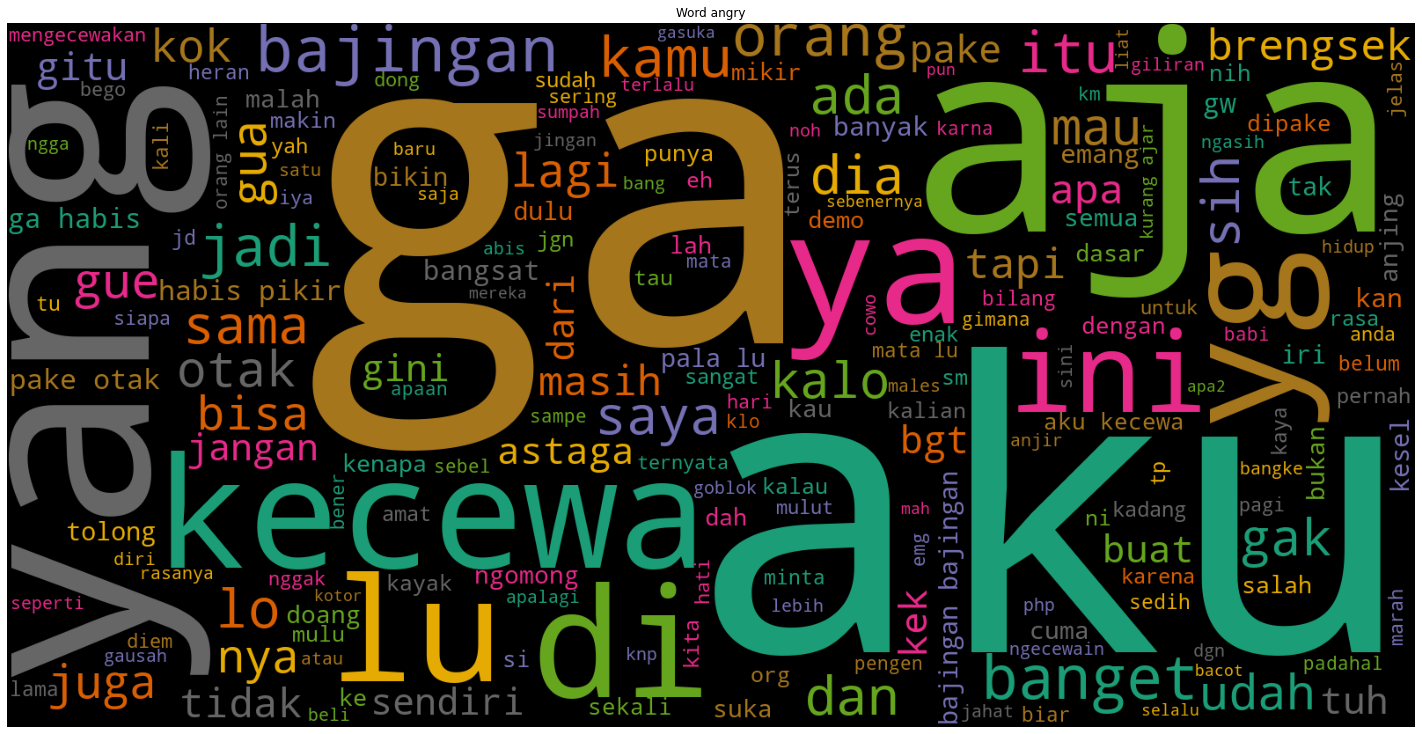

In [22]:
data_angry = data.loc[(data['label'] == "angry")]
word_angry = pd.Series(' '.join(data_angry['text']).split())
dat_angry = ' '.join(word_angry)

%matplotlib inline
wordcloud = WordCloud(background_color='black', mode="RGB", width=1600, height=800, colormap="Dark2").generate(dat_angry)
plt.figure(figsize=(20,10))
plt.title('Word angry')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [23]:
pd.Series(' '.join(data_angry['text']).split()).value_counts()[:-10]

ga           90
bajingan     81
aku          81
lu           76
kecewa       70
             ..
baca          1
solaria       1
ngajarin      1
transaksi     1
distu         1
Length: 2372, dtype: int64

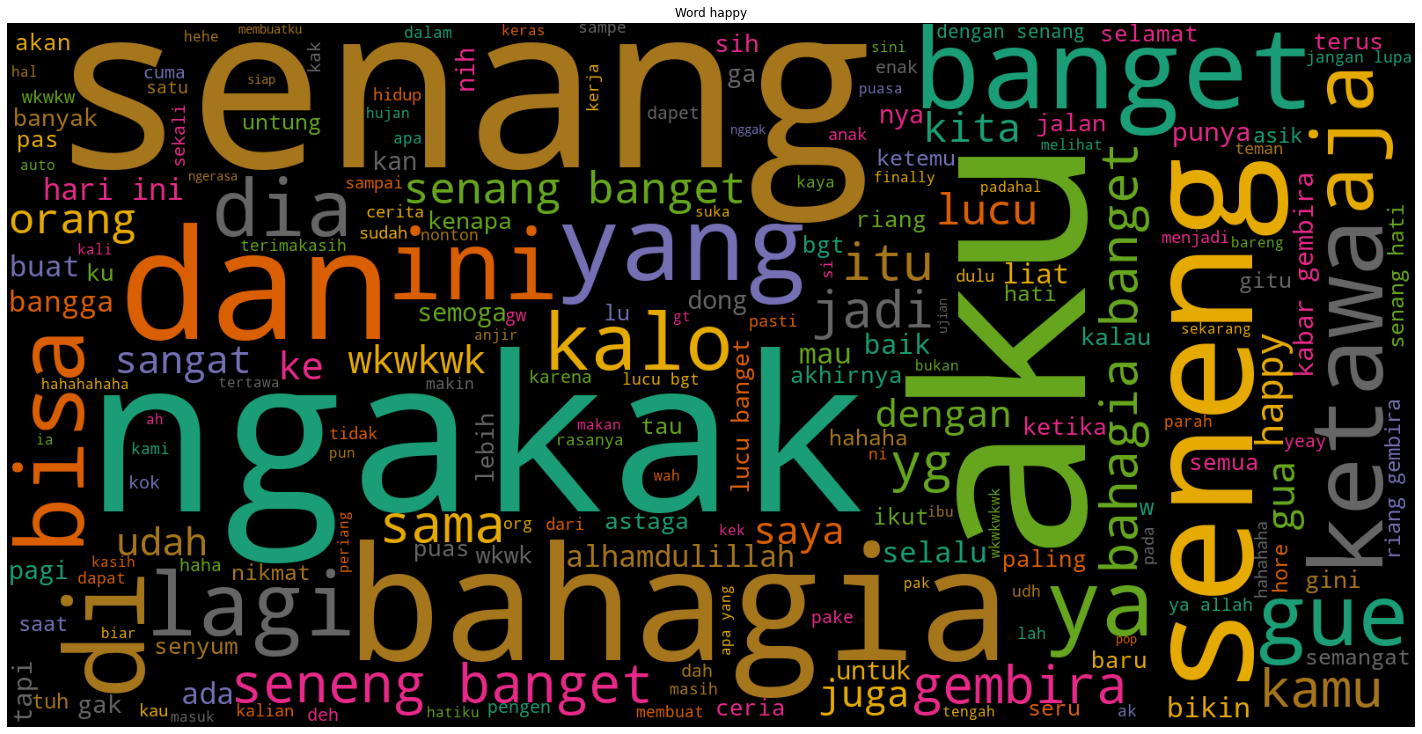

In [24]:
data_happy = data.loc[(data['label'] == "happy")]
word_happy = pd.Series(' '.join(data_happy['text']).split())
dat_happy = ' '.join(word_happy)

%matplotlib inline
wordcloud = WordCloud(background_color='black', mode="RGB", width=1600, height=800, colormap="Dark2").generate(dat_happy)
plt.figure(figsize=(20,10))
plt.title('Word happy')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [25]:
pd.Series(' '.join(data_happy['text']).split()).value_counts()[:-10]

banget      152
senang      135
aku          94
bahagia      90
seneng       87
           ... 
sampah        1
syahadat      1
terhibur      1
them          1
teruntuk      1
Length: 1873, dtype: int64

stopword by NLTK

In [26]:
print(stopwords.fileids())

['arabic', 'azerbaijani', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'greek', 'hungarian', 'indonesian', 'italian', 'kazakh', 'nepali', 'norwegian', 'portuguese', 'romanian', 'russian', 'slovene', 'spanish', 'swedish', 'tajik', 'turkish']


In [27]:
list_stopwords = set(stopwords.words('indonesian'))
len(list_stopwords)

757

In [28]:
stop = list_stopwords
data['text-stp-nltk'] = data['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
data.head()

,text,label,text-stp-nltk
0,foto nya di editin sama minta di tag tapi takut,afraid,foto nya editin tag takut
1,kok serem ya,afraid,serem ya
2,takut liat fotonya pocong,afraid,takut liat fotonya pocong
3,serem udah tua soalnya,afraid,serem udah tua
4,hiiiii,afraid,hiiiii


stopword by sastrawi

In [29]:
factory = StopWordRemoverFactory()
stopwords = factory.get_stop_words()
len(stopwords)

126

In [30]:
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()

data['text-stp-sastrawi'] = data['text'].apply(lambda x: " ".join(stopword.remove(x) for x in x.split() ))
data.head()

,text,label,text-stp-nltk,text-stp-sastrawi
0,foto nya di editin sama minta di tag tapi takut,afraid,foto nya editin tag takut,foto nya editin sama minta tag takut
1,kok serem ya,afraid,serem ya,kok serem
2,takut liat fotonya pocong,afraid,takut liat fotonya pocong,takut liat fotonya pocong
3,serem udah tua soalnya,afraid,serem udah tua,serem udah tua soalnya
4,hiiiii,afraid,hiiiii,hiiiii


In [31]:
pd.Series(' '.join(data['text-stp-nltk']).split()).value_counts()[:-10]

ga                 266
banget             265
ya                 188
takut              188
aja                185
                  ... 
kusimpan             1
dipermalukannya      1
bersumpah            1
dipantau             1
amann                1
Length: 4934, dtype: int64

In [32]:
pd.Series(' '.join(data['text-stp-sastrawi']).split()).value_counts()[:-10]

aku       498
ga        266
banget    265
kamu      252
sama      199
         ... 
gusti       1
kya         1
fuji        1
sambal      1
nyepik      1
Length: 5191, dtype: int64

encoder label

In [33]:
data['fit_label'] = LabelEncoder().fit_transform(data['label'])

In [34]:
data.head()

,text,label,text-stp-nltk,text-stp-sastrawi,fit_label
0,foto nya di editin sama minta di tag tapi takut,afraid,foto nya editin tag takut,foto nya editin sama minta tag takut,0
1,kok serem ya,afraid,serem ya,kok serem,0
2,takut liat fotonya pocong,afraid,takut liat fotonya pocong,takut liat fotonya pocong,0
3,serem udah tua soalnya,afraid,serem udah tua,serem udah tua soalnya,0
4,hiiiii,afraid,hiiiii,hiiiii,0


split data train-test

In [35]:
train, test = train_test_split(data, test_size=0.2)

In [36]:
train

,text,label,text-stp-nltk,text-stp-sastrawi,fit_label
331,duhh ga berani kalo yang itu wkwk,afraid,duhh ga berani kalo wkwk,duhh ga berani kalo wkwk,0
74,malu2 yachh,afraid,malu2 yachh,malu2 yachh,0
400,serem banget sumpah,afraid,serem banget sumpah,serem banget sumpah,0
463,ketakutan yg amat sangat,afraid,ketakutan yg,ketakutan yg sangat,0
1207,sesuatu yg berlebihan itu tdk baik salah satun...,angry,yg tdk salah satunya kesombongan,yg berlebihan tdk baik salah satunya kesombo...,1
...,...,...,...,...,...
2700,ayo jadian,love,ayo jadian,ayo jadian,3
2671,sayang mama papa selalu,love,sayang mama papa,sayang mama papa selalu,3
236,yaallah ini anginnya kenceng bgt serem,afraid,yaallah anginnya kenceng bgt serem,yaallah anginnya kenceng bgt serem,0
2874,kalo aku suka sama kamu kamu mau jadi pacarku ga,love,kalo suka pacarku ga,kalo aku suka sama kamu kamu mau jadi pacarku ga,3


In [37]:
test

,text,label,text-stp-nltk,text-stp-sastrawi,fit_label
1984,udah deh seneng gitu hihi masyaallah terimakas...,happy,udah deh seneng gitu hihi masyaallah terimakas...,udah deh seneng gitu hihi masyaallah terimakas...,2
138,takut gini main twitter pada bikin aliansi uda...,afraid,takut gini main twitter bikin aliansi udah kay...,takut gini main twitter bikin aliansi udah ka...,0
395,ngeri coyyy itu yang jaga kelihatan kayak amat...,afraid,ngeri coyyy jaga kayak amatir gitu wkwk,ngeri coyyy jaga kelihatan kayak amatir gitu...,0
2504,udah pasti sayang sama aku kan,love,udah sayang,udah sayang sama aku kan,3
3180,aku cuma sayang km tau km kan pacarku,love,sayang km tau km pacarku,aku cuma sayang km tau km kan pacarku,3
...,...,...,...,...,...
2161,yaampun w ngakak dari tweet sampai isi replyan...,happy,yaampun w ngakak tweet isi replyannya kasian d...,yaampun w ngakak tweet isi replyannya kasian...,2
2862,kasih,love,kasih,kasih,3
2831,jadi pacarku aja deh,love,pacarku aja deh,jadi pacarku aja deh,3
1186,bukannya ga peka tapi emang gatau diri,angry,ga peka emang gatau,bukannya ga peka emang gatau diri,1


Classification using SVM

In [46]:
#x_train
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(train['text'])
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

#y_train
y_list = list(train['fit_label'])
Y_train = np.array(y_list)

In [47]:
print('train data : ', X_train_tfidf.shape)
print('train label : ', Y_train.shape)

train data :  (2604, 4553)
train label :  (2604,)


In [48]:
start_time = datetime.now()

svc = SVC(kernel='linear')
svc.fit(X_train_tfidf, Y_train)

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Duration: 0:00:00.467999


In [49]:
a = count_vect.transform(test['text'])
X_test = tfidf_transformer.transform(a).toarray()
print (X_test.shape)

Y_test = list(test['fit_label'])

(652, 4553)


In [50]:
predictions_svm = svc.predict(X_test)

In [51]:
print("SVM Accuracy Score : ",accuracy_score(predictions_svm, Y_test)*100)

SVM Accuracy Score :  85.7361963190184


with stopword

In [52]:
#x_train
count_vect = CountVectorizer()
X_train_stp_counts = count_vect.fit_transform(train['text-stp-nltk'])
tfidf_transformer = TfidfTransformer()
X_train_stp_tfidf = tfidf_transformer.fit_transform(X_train_stp_counts)

#y_train
y_list = list(train['fit_label'])
Y_train_stp = np.array(y_list)

In [53]:
print('train data : ', X_train_stp_tfidf.shape)
print('train label : ', Y_train_stp.shape)

train data :  (2604, 4208)
train label :  (2604,)


In [54]:
start_time = datetime.now()

svc_stp = SVC(kernel='linear')
svc_stp.fit(X_train_stp_tfidf, Y_train_stp)

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Duration: 0:00:00.350240


In [55]:
a = count_vect.transform(test['text-stp-nltk'])
X_test_stp = tfidf_transformer.transform(a).toarray()
print (X_test_stp.shape)

Y_test_stp = list(test['fit_label'])

(652, 4208)


In [56]:
predictions_svm_stp = svc_stp.predict(X_test_stp)

In [57]:
print("SVM Accuracy Score : ",accuracy_score(predictions_svm_stp, Y_test_stp)*100)

SVM Accuracy Score :  85.88957055214725


predict

In [58]:
len (kata_kunci)

3500

In [59]:
test_twitter = kata_kunci[13:23]
test_twitter

['KARANGANYAR - Sosialisasi gerakan 3M protokol kesehatan Covid-19 berupa memakai masker, menjaga jarak dan mencuci tangan pakai sabun butuh peran aktif semua pihak, sehingga dipatuhi dan dijalankan seluruh komponen masyarakat dalam kehidupan sehari-hari. https://t.co/HWvAbpmNYE',
 'Prokes 5 mberhasil tekan kasus baru covid #AdiliKoruptorPapua https://t.co/8PXuVqqi7F',
 'Waspada Penipuan online. Yuk Kenali Kejahatan Cyber.\n\nAda ribuan penipu sudah bersiap memanfaatkan program vaksinasi Covid-19. Penipuan akan terlihat meyakinkan, seolah resmi dikeluarkan oleh pemerintah. Oleh karena itu masyarakat diminta waspada https://t.co/bryjMbyLYu',
 'Kepri Sediakan 6 Ribu Dosis Vaksin Covid-19 Bagi Kalangan Lansia\n\nhttps://t.co/vEebScQhC8\n\n#vaksin #lansia',
 'Personil Polsek Teluk Mengkudu melaksanakan kegiatan himbauan prokes pada malam hari dalam rangka pencegahan penyebaran Covid-19 di wilayah Kec. Teluk Mengkudu. Rabu (03/03/2021) pukul 20.30 Wib. https://t.co/GxOV41o2Hp',
 'Kali ini m

In [60]:
data_twitter = pd.DataFrame(test_twitter,columns=['text'])
data_twitter

,text
0,KARANGANYAR - Sosialisasi gerakan 3M protokol ...
1,Prokes 5 mberhasil tekan kasus baru covid #Adi...
2,Waspada Penipuan online. Yuk Kenali Kejahatan ...
3,Kepri Sediakan 6 Ribu Dosis Vaksin Covid-19 Ba...
4,Personil Polsek Teluk Mengkudu melaksanakan ke...
5,Kali ini mending sakit hati deh bener daripa...
6,"Anggota Polres Tanggamus Divaksin Covid-19, Ta..."
7,"Cegah Penyebaran Varian Baru COVID-19 Meluas, ..."
8,KARANGANYAR - Sosialisasi gerakan 3M protokol ...
9,Banyak juga penyintas covid yang mengalami pik...


In [61]:
data_twitter['text'] = data_twitter['text'].str.replace('\s+',' ')
data_twitter['text'] = data_twitter['text'].str.replace('[^\w\s-]','')
data_twitter['text'] = data_twitter['text'].apply(lambda x: x.lower())

E:\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.
E:\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [62]:
data_twitter

,text
0,karanganyar - sosialisasi gerakan 3m protokol ...
1,prokes 5 mberhasil tekan kasus baru covid adil...
2,waspada penipuan online yuk kenali kejahatan c...
3,kepri sediakan 6 ribu dosis vaksin covid-19 ba...
4,personil polsek teluk mengkudu melaksanakan ke...
5,kali ini mending sakit hati deh bener daripada...
6,anggota polres tanggamus divaksin covid-19 tah...
7,cegah penyebaran varian baru covid-19 meluas b...
8,karanganyar - sosialisasi gerakan 3m protokol ...
9,banyak juga penyintas covid yang mengalami pik...


In [63]:
def predict (i):
    a = count_vect.transform([i])
    X_coba = tfidf_transformer.transform(a).toarray()
    y_pred = svc_stp.predict(X_coba)
    return (y_pred[0])

def predict_stp (i):
    a = count_vect.transform([i])
    X_coba = tfidf_transformer.transform(a).toarray()
    y_pred = svc_stp.predict(X_coba)
    return (y_pred[0])

def change_label (input_label):
    if input_label== 0 :
        label = 'affraid'
    elif input_label== 1 :
        label = 'angry'
    elif input_label == 2 :
        label = 'happy'
    else :
        label = 'love'
    
    return (label)

In [64]:
data_twitter['label'] = data_twitter['text'].apply(lambda x: change_label(predict(x)) )

with stopword

In [65]:
data_twitter['text-stp-nltk'] = data_twitter['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [66]:
list_stop_new = ['null']

In [67]:
data_twitter['label-stp'] = data_twitter['text-stp-nltk'].apply(lambda x: change_label(predict_stp(x)))

In [68]:
data_twitter

,text,label,text-stp-nltk,label-stp
0,karanganyar - sosialisasi gerakan 3m protokol ...,angry,karanganyar - sosialisasi gerakan 3m protokol ...,angry
1,prokes 5 mberhasil tekan kasus baru covid adil...,angry,prokes 5 mberhasil tekan covid adilikoruptorpa...,angry
2,waspada penipuan online yuk kenali kejahatan c...,happy,waspada penipuan online yuk kenali kejahatan c...,happy
3,kepri sediakan 6 ribu dosis vaksin covid-19 ba...,angry,kepri sediakan 6 ribu dosis vaksin covid-19 ka...,angry
4,personil polsek teluk mengkudu melaksanakan ke...,angry,personil polsek teluk mengkudu melaksanakan ke...,angry
5,kali ini mending sakit hati deh bener daripada...,angry,kali mending sakit hati deh bener sakit gigi c...,angry
6,anggota polres tanggamus divaksin covid-19 tah...,angry,anggota polres tanggamus divaksin covid-19 tah...,angry
7,cegah penyebaran varian baru covid-19 meluas b...,angry,cegah penyebaran varian covid-19 meluas bandar...,angry
8,karanganyar - sosialisasi gerakan 3m protokol ...,angry,karanganyar - sosialisasi gerakan 3m protokol ...,angry
9,banyak juga penyintas covid yang mengalami pik...,angry,penyintas covid mengalami pikiran2 bunuh depre...,angry


# thank you